# Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn import preprocessing
from sklearn import metrics

import time
from contextlib import contextmanager
import gc
import warnings
import pprint
from IPython.display import clear_output

# Configuration

In [23]:
RANDOM_STATE= 190276
ROOT_INPUT = './data/work/'

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set()
pd.set_option('display.max_columns', 151)

# Fonctions

In [24]:
# Time tracking
@contextmanager
def timer(title: str):
    t0 = time.time()
    yield
    print("{} - éxécuté en {:.0f}s".format(title, time.time() - t0))

def scale(df: pd.DataFrame, robust = True) -> pd.DataFrame:
    
    if robust:
        scaler = preprocessing.RobustScaler()
    else:
        scaler = preprocessing.StandardScaler()
    columns = df.columns
    index = df.index
    df_scaled = scaler.fit_transform(df)
    
    df_scaled = pd.DataFrame(df_scaled, columns=columns, index=index)
    
    return df_scaled

# Load DataFrame

In [25]:
df = pd.read_pickle(ROOT_INPUT + 'olist_group_by_customer_unique_id.pickle')
df

,orders_count,customer_geolocation_lat_mean,customer_geolocation_lat_count,customer_geolocation_lat_most_frequent,customer_geolocation_lng_mean,customer_geolocation_lng_count,customer_geolocation_lng_most_frequent,order_purchase_timestamp_min,order_purchase_timestamp_max,products_count_min,products_count_max,product_count_mean,seller_count_min,seller_count_max,seller_count_mean,price_item_min,price_item_max,total_orders_price,mean_orders_price,total_freight_value,mean_freight_value,seller_geolocation_lat_mean,seller_geolocation_lng_mean,product_name_lenght_mean,product_description_lenght_mean,product_photos_qty_mean,order_weight_mean,order_length_mean,order_height_mean,order_width_mean,payment_sequential_mean,payment_installments_mean,payment_value_sum,review_score_min,review_score_max,review_score_mean,purchase_days_from_today_min,purchase_days_from_today_max,purchase_days_from_today_mean,elapse_time_mean,cat_agro_industria_e_comercio_count,cat_alimentos_count,cat_alimentos_bebidas_count,cat_artes_count,cat_artes_e_artesanato_count,cat_artigos_de_festas_count,cat_artigos_de_natal_count,cat_audio_count,cat_automotivo_count,cat_bebes_count,cat_bebidas_count,cat_beleza_saude_count,cat_brinquedos_count,cat_cama_mesa_banho_count,cat_casa_conforto_count,cat_casa_conforto_2_count,cat_casa_construcao_count,cat_cds_dvds_musicais_count,cat_cine_foto_count,cat_climatizacao_count,cat_consoles_games_count,cat_construcao_ferramentas_construcao_count,cat_construcao_ferramentas_ferramentas_count,cat_construcao_ferramentas_iluminacao_count,cat_construcao_ferramentas_jardim_count,cat_construcao_ferramentas_seguranca_count,cat_cool_stuff_count,cat_dvds_blu_ray_count,cat_eletrodomesticos_count,cat_eletrodomesticos_2_count,cat_eletronicos_count,cat_eletroportateis_count,cat_esporte_lazer_count,cat_fashion_bolsas_e_acessorios_count,cat_fashion_calcados_count,...,cat_fashion_roupa_masculina_count,cat_fashion_underwear_e_moda_praia_count,cat_ferramentas_jardim_count,cat_flores_count,cat_fraldas_higiene_count,cat_industria_comercio_e_negocios_count,cat_informatica_acessorios_count,cat_instrumentos_musicais_count,cat_la_cuisine_count,cat_livros_importados_count,cat_livros_interesse_geral_count,cat_livros_tecnicos_count,cat_malas_acessorios_count,cat_market_place_count,cat_moveis_colchao_e_estofado_count,cat_moveis_cozinha_area_de_servico_jantar_e_jardim_count,cat_moveis_decoracao_count,cat_moveis_escritorio_count,cat_moveis_quarto_count,cat_moveis_sala_count,cat_musica_count,cat_papelaria_count,cat_pc_gamer_count,cat_pcs_count,cat_perfumaria_count,cat_pet_shop_count,cat_portateis_casa_forno_e_cafe_count,cat_portateis_cozinha_e_preparadores_de_alimentos_count,cat_relogios_presentes_count,cat_seguros_e_servicos_count,cat_sinalizacao_e_seguranca_count,cat_tablets_impressao_imagem_count,cat_telefonia_count,cat_telefonia_fixa_count,cat_utilidades_domesticas_count,payment_type_boleto_count,payment_type_credit_card_count,payment_type_debit_card_count,payment_type_not_defined_count,payment_type_voucher_count,order_status_approved_count,order_status_canceled_count,order_status_created_count,order_status_delivered_count,order_status_invoiced_count,order_status_processing_count,order_status_shipped_count,order_status_unavailable_count,purchase_year_2016_count,purchase_year_2017_count,purchase_year_2018_count,purchase_month_1_count,purchase_month_2_count,purchase_month_3_count,purchase_month_4_count,purchase_month_5_count,purchase_month_6_count,purchase_month_7_count,purchase_month_8_count,purchase_month_9_count,purchase_month_10_count,purchase_month_11_count,purchase_month_12_count,purchase_quarter_1_count,purchase_quarter_2_count,purchase_quarter_3_count,purchase_quarter_4_count,purchase_day_of_week_0_count,purchase_day_of_week_1_count,purchase_day_of_week_2_count,purchase_day_of_week_3_count,purchase_day_of_week_4_count,purchase_day_of_week_5_count,purchase_day_of_week_6_count,order_frequency
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

# Test Clustering avec toutes les features

## Test PCA

In [26]:
df.dtypes.value_counts()

float64           112
int64              39
datetime64[ns]      2
Name: count, dtype: int64

In [27]:
df_pca = df.select_dtypes(['number'])
df_pca = scale(df_pca, False)
pca_columns = df_pca.columns.to_list()

In [28]:
from sklearn import decomposition
PCA = decomposition.PCA(n_components=df_pca.shape[1])
PCA.fit(df_pca.values)

PCA(n_components=151)

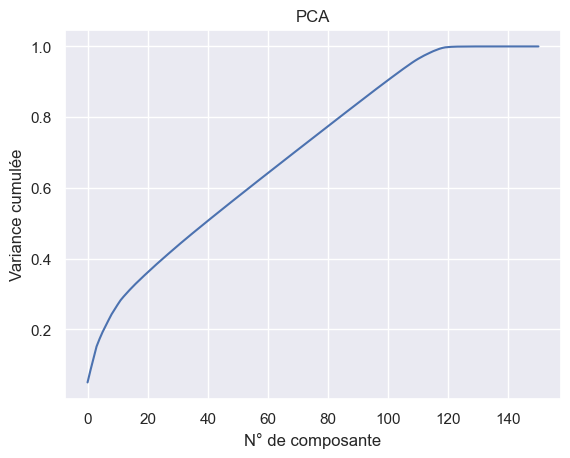

In [29]:
fig = plt.figure()
pd.Series(PCA.explained_variance_ratio_).cumsum().plot()
plt.title('PCA')
plt.xlabel('N° de composante')
plt.ylabel('Variance cumulée')
plt.show()

In [30]:
print(f'Explication de la variance sur les 2 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1])*100:.2f}%')

Explication de la variance sur les 2 premiers axes = 8.55%


In [31]:
print(f'Explication de la variance sur les 3 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1] + PCA.explained_variance_ratio_[2])*100:.2f}%')

Explication de la variance sur les 3 premiers axes = 11.93%


La PCA est inneficace pour projeter les données sur 2 ou 3 axes. La variance exprimée dans ce cas est trop faible, le jeu de données est mal représenté

## Kmeans

### Recherche manuelle

In [32]:
from sklearn.cluster import KMeans

df_kmean_1 = scale(df.select_dtypes('number')).sample(6000)
X = df_kmean_1.values

silhouette = pd.DataFrame()

for n_clusters in range(2,10,1):
    for i in range(5):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        silhouette.loc[n_clusters, f'test {i+1}'] = metrics.silhouette_score(X=X, labels=kmeans.labels_, sample_size=1000)
silhouette['mean'] = silhouette.mean(axis=1)
silhouette['std'] = silhouette.std(axis=1)

silhouette

,test 1,test 2,test 3,test 4,test 5,mean,std
2,0.935379,0.924663,0.937659,0.937436,0.924960,0.932019,0.005939
3,0.889810,0.887562,0.878041,0.902528,0.891297,0.889848,0.007842
4,0.604449,0.637023,0.601609,0.603981,0.543766,0.598166,0.030181
5,0.610846,0.599002,0.564821,0.597072,0.614071,0.597162,0.017450
6,0.361400,0.365855,0.297853,0.291766,0.422419,0.347858,0.048401
7,0.433522,0.400562,0.402296,0.357769,0.385600,0.395950,0.024650
8,0.167342,0.275230,0.188639,0.171526,0.169149,0.194377,0.041133
9,0.191151,0.195582,0.184937,0.199474,0.175328,0.189294,0.008493


Le clustering est stable

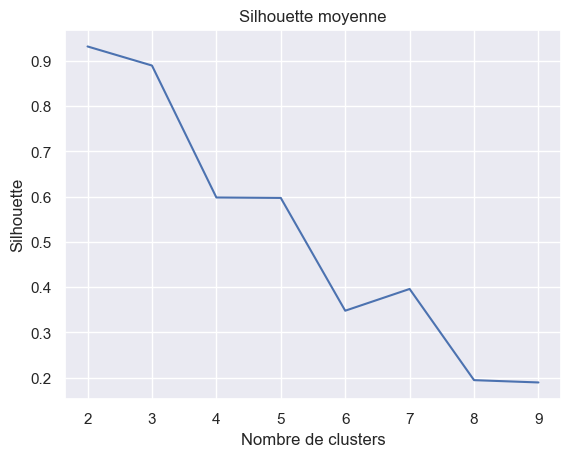

In [33]:
silhouette['mean'].plot()
plt.title('Silhouette moyenne')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette')
plt.show()

Avec seulement 2 ou 3 clusters, l'interprétation sera compliquée 

La solution a 5 clusters pourraient etre meilleure pour la segmentation

### Recherche avec la librairie Yellowbrick

In [34]:
from yellowbrick.cluster import elbow
def model_kmean(df, n_clusters = None, silhouette_only = False, silhouette_print = True, random_state = None, custom_pairplots = []):
    
    # Selection des types number uniquement
    df_kmean = df.select_dtypes('number')
    
    # Robust scale
    df_scaled = scale(df_kmean)
    
    # Yellow brick
    if n_clusters == None:
        X = df_scaled.sample(6000, random_state=RANDOM_STATE).values
        model = KMeans()
        visualizer = elbow.kelbow_visualizer(model=model, X=X, k=(2,10), timings=True, show=(not silhouette_only))
        visualizer.fit(X)
        n_clusters = visualizer.elbow_value_
        if (silhouette_only):
            plt.clf()
            plt.close()
    
    # Fit
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(df_scaled)
    
    # Silhouette
    silhouette = metrics.silhouette_score(X=df_scaled.values, labels=kmeans.labels_, sample_size=np.min([10000, df_scaled.shape[0]]), random_state=random_state)
    if silhouette_print: print(f'Silhouette: {silhouette:.3f}')
    if silhouette_only: return silhouette
    
    # Graph comptage client/cluster
    sns.histplot(x=kmeans.labels_, stat='count', log_scale=[False, True], discrete=True)
    plt.title('Nombre de clients par cluster')
    plt.xticks(list(np.sort(np.unique(kmeans.labels_))))
    plt.xlabel('N° de cluster')
    plt.ylabel('Nombre de clients')
    plt.show()
    
    # Graph 3D RFM
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(df_kmean['recence'], df_kmean['frequence'], df_kmean['montant'], marker='o', s=30, edgecolor='k', c=kmeans.labels_, cmap='Set3')
    ax.set_xlabel('Récence')
    ax.set_ylabel('Fréquence')
    ax.set_zlabel('Montant')
    ax.view_init(elev=15, azim=45)
    plt.show()
    
    # Pair plot des feature du DF
    df_kmean['class'] = kmeans.labels_
    df_kmean['label'] = kmeans.labels_
    sns.pairplot(data=df_kmean, vars=['recence', 'frequence', 'montant'] + custom_pairplots + ['label'], hue='class', palette='bright')
    
    return kmeans

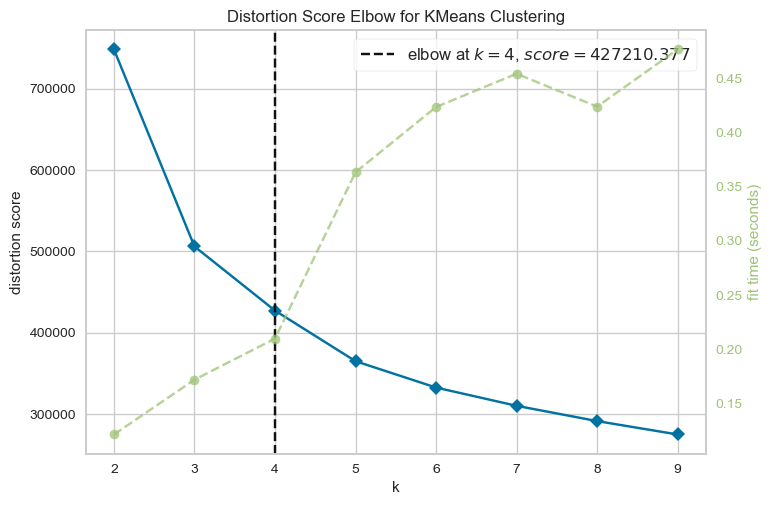

Silhouette: 0.586


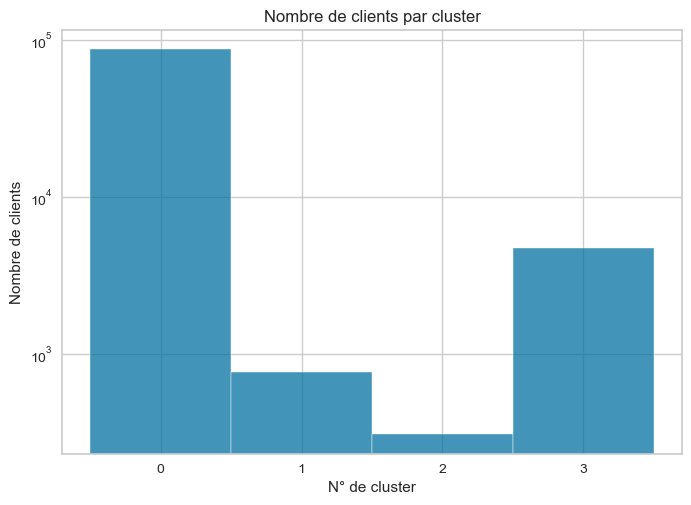

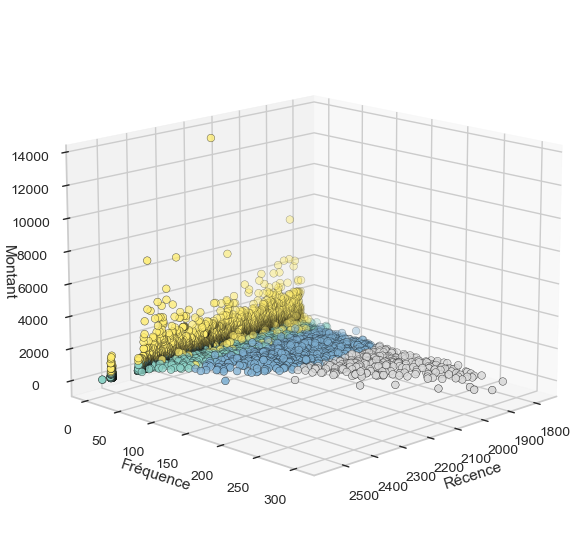

KMeans(n_clusters=4, random_state=190276)

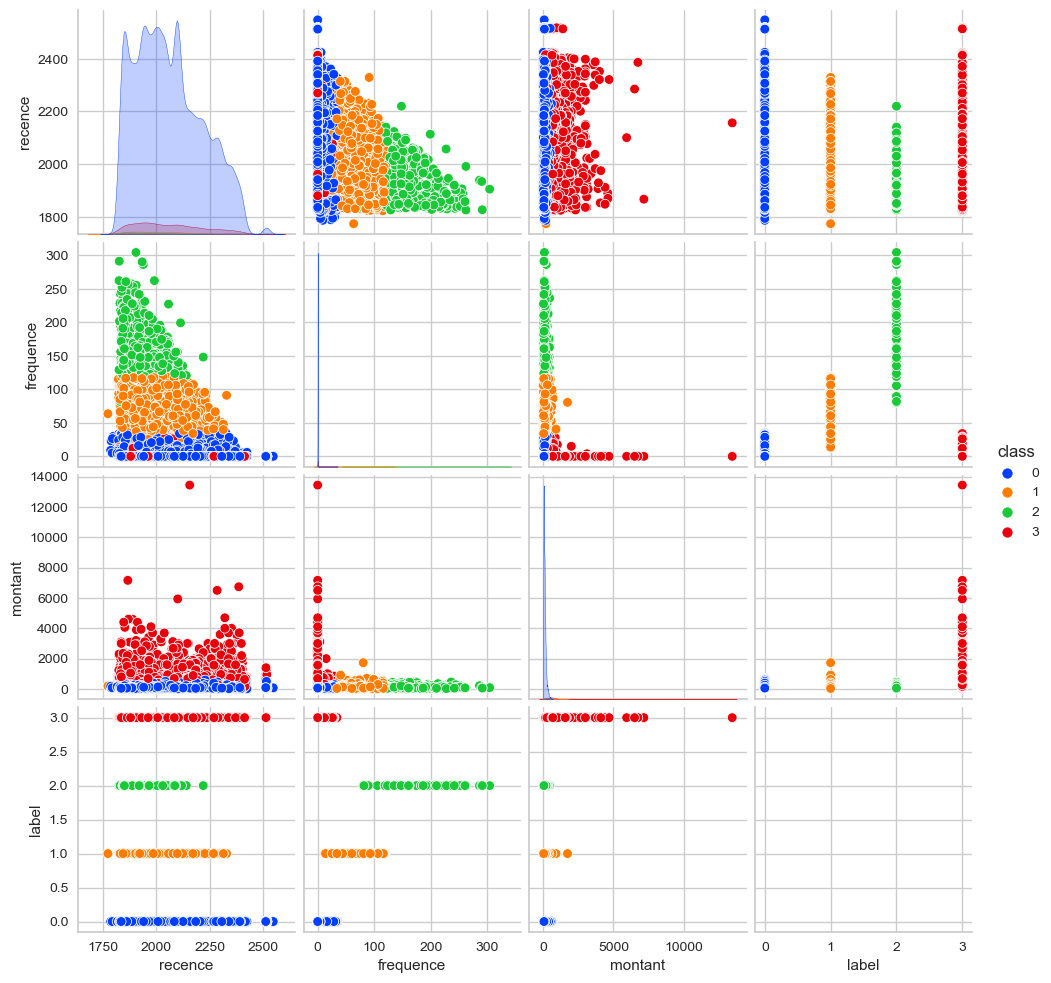

In [35]:
df_kmean_1 = df.copy()
df_kmean_1.rename(columns={'purchase_days_from_today_min': 'recence', 'order_frequency': 'frequence', 'mean_orders_price': 'montant'}, inplace=True)

model_kmean(df_kmean_1,random_state=RANDOM_STATE)

In [36]:
df_kmean_1 = df.copy()
df_kmean_1.rename(columns={'purchase_days_from_today_min': 'recence', 'order_frequency': 'frequence', 'mean_orders_price': 'montant'}, inplace=True)

silhouettes = []
for i in range(10):
    silhouettes.append(model_kmean(df_kmean_1, n_clusters=4, silhouette_only=True))
    
print(f'Silhouette moyenne: {np.mean(silhouettes):.3f}, Ecart type: {np.std(silhouettes):.4f}')

Silhouette: 0.574
Silhouette: 0.581
Silhouette: 0.595
Silhouette: 0.585
Silhouette: 0.569
Silhouette: 0.579
Silhouette: 0.588
Silhouette: 0.579
Silhouette: 0.585
Silhouette: 0.584
Silhouette moyenne: 0.582, Ecart type: 0.0069


Le clustering est stable

## Conclusion

Dans notre cas de figure, l'utilisation de la globalité des données (avec les infos produits, catégories etc...) donne un resultat interprétrable des clusters avec un coeficient de silhouette plutot bon (0.586)

Hypothèse de segmentation:

<div style="margin-left: 0; margin-right: auto; width: 40%">
    
Class | Recence | Fréquence | Montants | Segment
--- | --- | --- |--- | ---
3 | Diverse | Faible | Faibles à élévés | Acheteurs compulsifs  
2 | Faible à moyenne | Moyenne à Elévée | Faibles | Acheteur nouveau et engagés
1 | Diverse | Faible à Moyenne | Moyens | Acheteur régulier
0 | Diverse | Faible | Faible | Acheteur pontuel


</div>    

# Test clustering avec un dataset RFM

Je décide de restreindre le dataframe eux composantes RFM (récence, fréquence, montant)

## Création et normalisation du dataset RFM

In [37]:
df_rfm = pd.DataFrame()
df_rfm['recence'] = df['purchase_days_from_today_min']
df_rfm['frequence'] = df['order_frequency']
df_rfm['montant'] = df['mean_orders_price']
df_rfm

,recence,frequence,montant
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1934,0.0,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1937,0.0,18.90
0000f46a3911fa3c0805444483337064,2360,0.0,69.00
0000f6ccb0745a6a4b88665a16c9f078,2144,0.0,25.99
0004aac84e0df4da2b147fca70cf8255,2111,0.0,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2270,0.0,1570.00
fffea47cd6d3cc0a88bd621562a9d061,2085,0.0,64.89
ffff371b4d645b6ecea244b27531430a,2391,0.0,89.90


## Visualisation

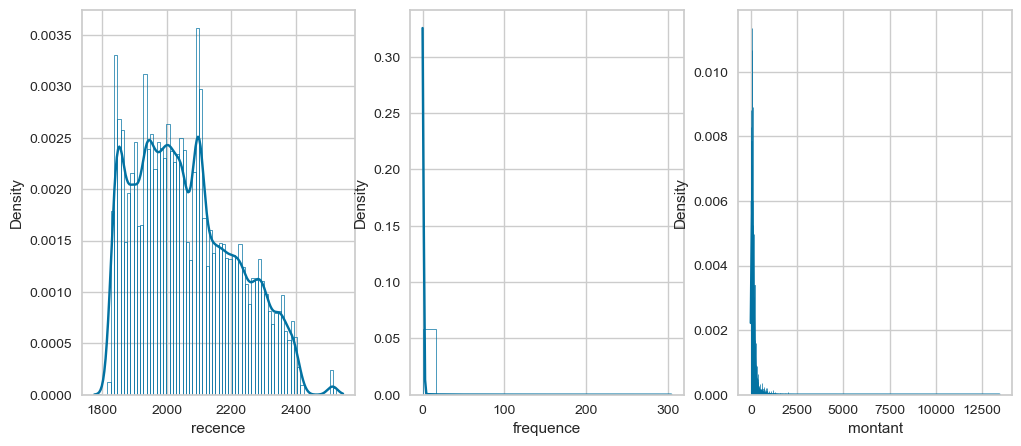

In [38]:
fig, ax =plt.subplots(1,3,figsize=(12,5))
ax1 = sns.histplot(data=df_rfm, x='recence', stat='density', kde=True, fill=False, ax=ax[0])
ax2 = sns.histplot(data=df_rfm, x='frequence', stat='density', kde=True,fill=False, ax=ax[1])
ax3 = sns.histplot(data=df_rfm, x='montant', stat='density', kde=True, fill=False, ax=ax[2])

La récence est relativement homogène mais la fréquence et les montant sont concentrés sur de petites valeurs

## Kmeans

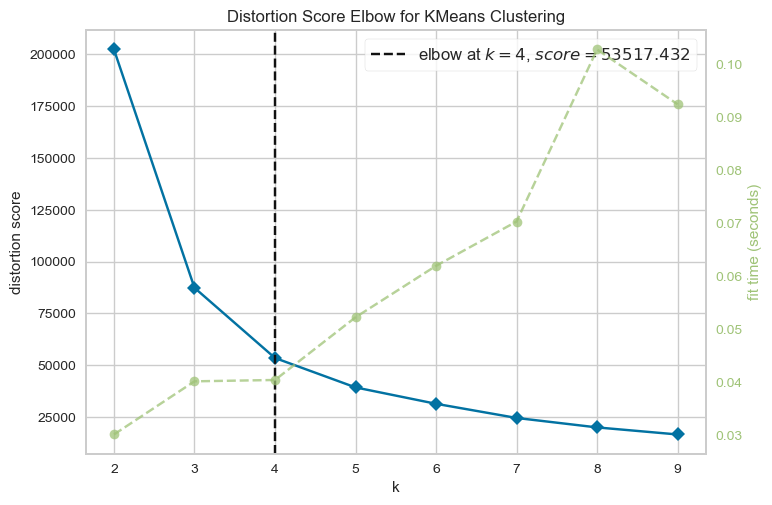

Silhouette: 0.948


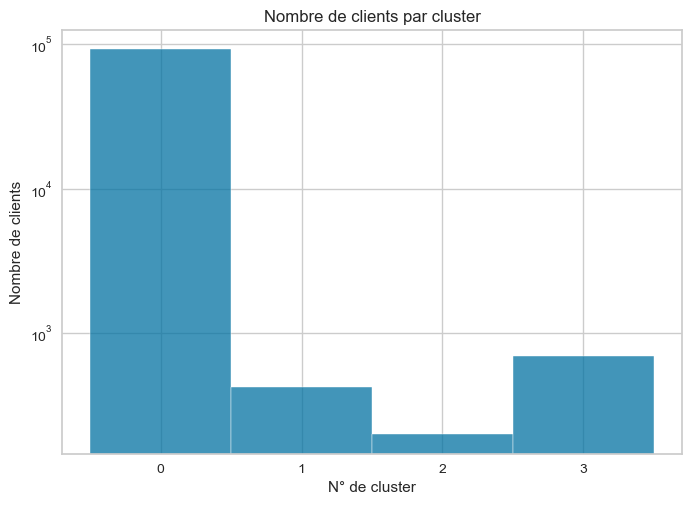

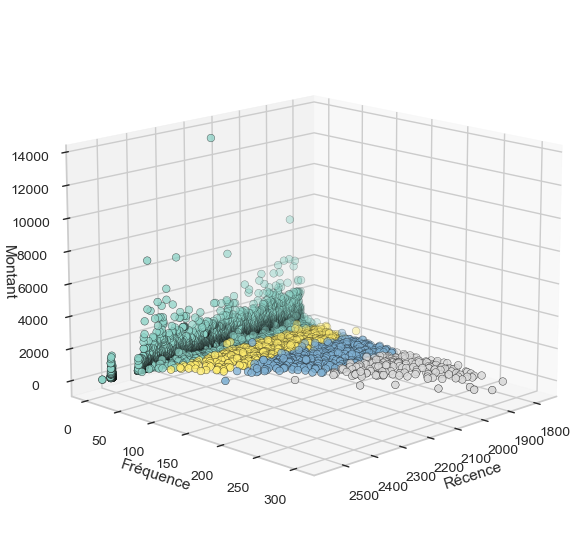

KMeans(n_clusters=4, random_state=190276)

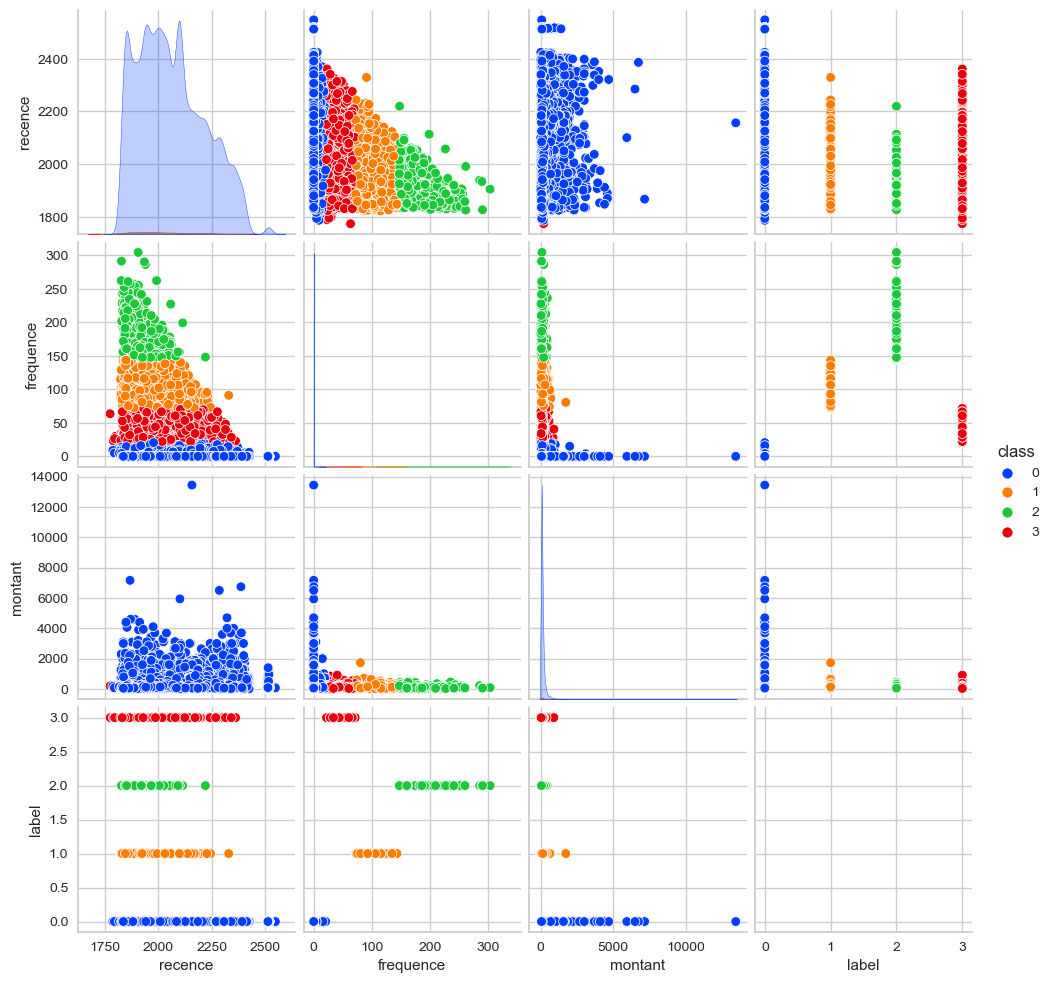

In [39]:
model_kmean(df=df_rfm, random_state=RANDOM_STATE)

### Conclusion

En ne gardant que les données RFM le coeficient de silhouette est bien meilleurs (0.948 au lieu de 0.586 avec le dataset complet) et la segmentation est visuellement plus nette

Hypothèse de segmentation:

<div style="margin-left: 0; margin-right: auto; width: 40%">
    
Class | Recence | Fréquence | Montants | Segment
--- | --- | --- |--- | ---
3 | Diverse | Faible | Faible | Acheteur pontuel     
2 | Faible à moyenne | Moyenne à Elévée | Faibles | Acheteur nouveau et engagés
1 | Faible à moyenne | Moyenne | Faible à Moyens | Acheteur régulier  
0 | Diverse | Faible | Faibles à élévés | Acheteurs compulsifs      

</div>  

## Dbscan

Analyse basée sur les explications de cet article: https://sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

Aide sur memory overflow: https://stackoverflow.com/questions/16381577/scikit-learn-dbscan-memory-usage

### Distance optimum

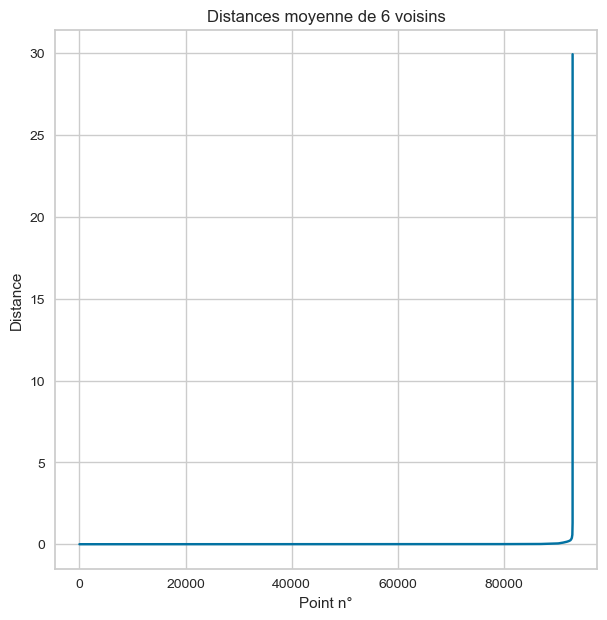

In [40]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

df_dbscan = scale(df_rfm, robust=False)
n_neighbors = df_dbscan.shape[1]*2

neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors_fit = neighbors.fit(df_dbscan)
distances, indices = neighbors_fit.kneighbors(df_dbscan)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(7, 7))
plt.plot(range(len(distances)), distances)
plt.title(f'Distances moyenne de {n_neighbors} voisins')
plt.xlabel('Point n°')
plt.ylabel('Distance')
plt.show()

Recherche du point d'inflexion


<Figure size 500x500 with 0 Axes>

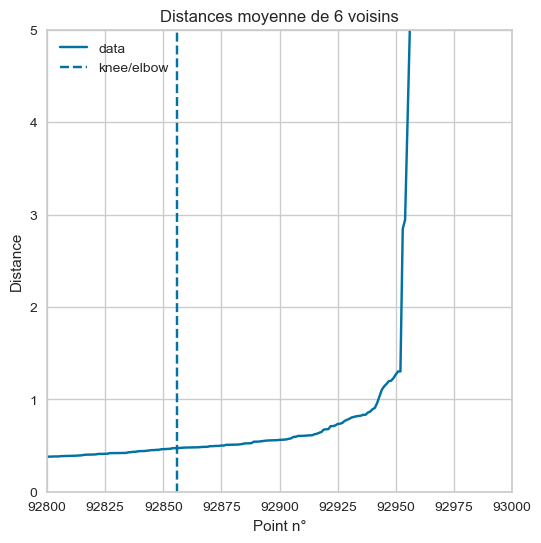

Distance optimum: 0.4714


In [41]:
from kneed import KneeLocator

print('Recherche du point d\'inflexion')

i = np.arange(len(distances))
knee = KneeLocator(i, distances, curve='convex', direction='increasing')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.xlim(92800, 93000)
plt.ylim(0, 5)
plt.title(f'Distances moyenne de {n_neighbors} voisins')
plt.xlabel('Point n°')
plt.ylabel('Distance')
plt.show()

print(f'Distance optimum: {distances[knee.knee]:.4f}')

### Model

In [42]:
from sklearn.cluster import DBSCAN

X = df_dbscan.values

dbscan = DBSCAN(eps=distances[knee.knee], min_samples=n_neighbors, n_jobs=-1)
dbscan.fit(X)

DBSCAN(eps=0.4713566418168682, min_samples=6, n_jobs=-1)

In [43]:
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Nombre de clusters: {n_clusters_}')
print(f'Nombre d\'outiers: {n_noise_}')

Nombre de clusters: 10
Nombre d'outiers: 234


In [44]:
silhouette = metrics.silhouette_score(X=df_dbscan.values, labels=labels, sample_size=3000)
print(f'Score silhouette: {silhouette:.3f}')

Score silhouette: 0.442


Text(0.5, 1.0, 'Nombre de clients par cluster')

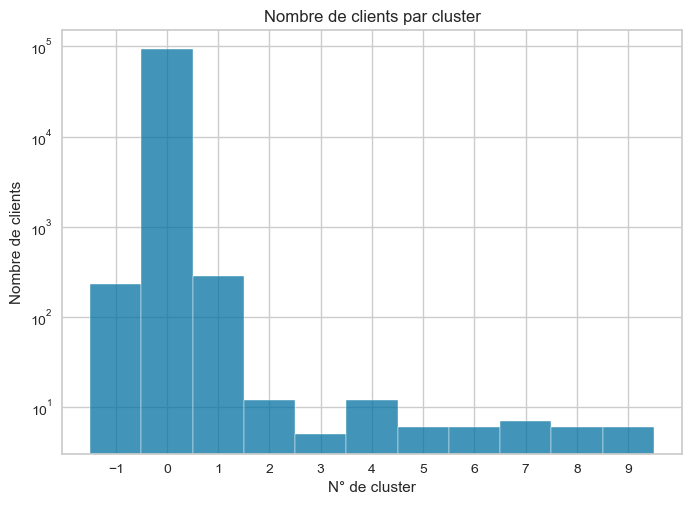

In [45]:
sns.histplot(x=labels, stat='count', log_scale=[False, True], discrete=True)
plt.xticks(range(-1, n_clusters_, 1))
plt.xlabel('N° de cluster')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients par cluster')

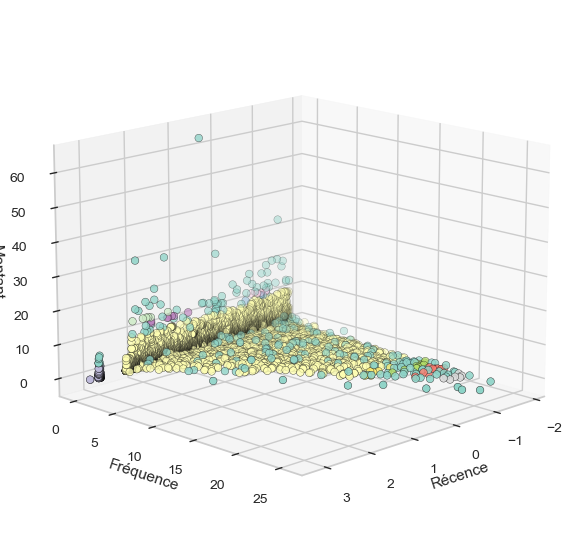

In [46]:
df_dbscan['label'] = labels
df_dbscan['class'] = labels
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_dbscan['recence'], df_dbscan['frequence'], df_dbscan['montant'], marker='o', s=30, edgecolor='k', c=df_dbscan['label'], cmap='Set3')
ax.set_xlabel('Récence')
ax.set_ylabel('Fréquence')
ax.set_zlabel('Montant')
ax.view_init(elev=15, azim=45)

On constate déjà visuellement que le cluster le plus important s'étale trop

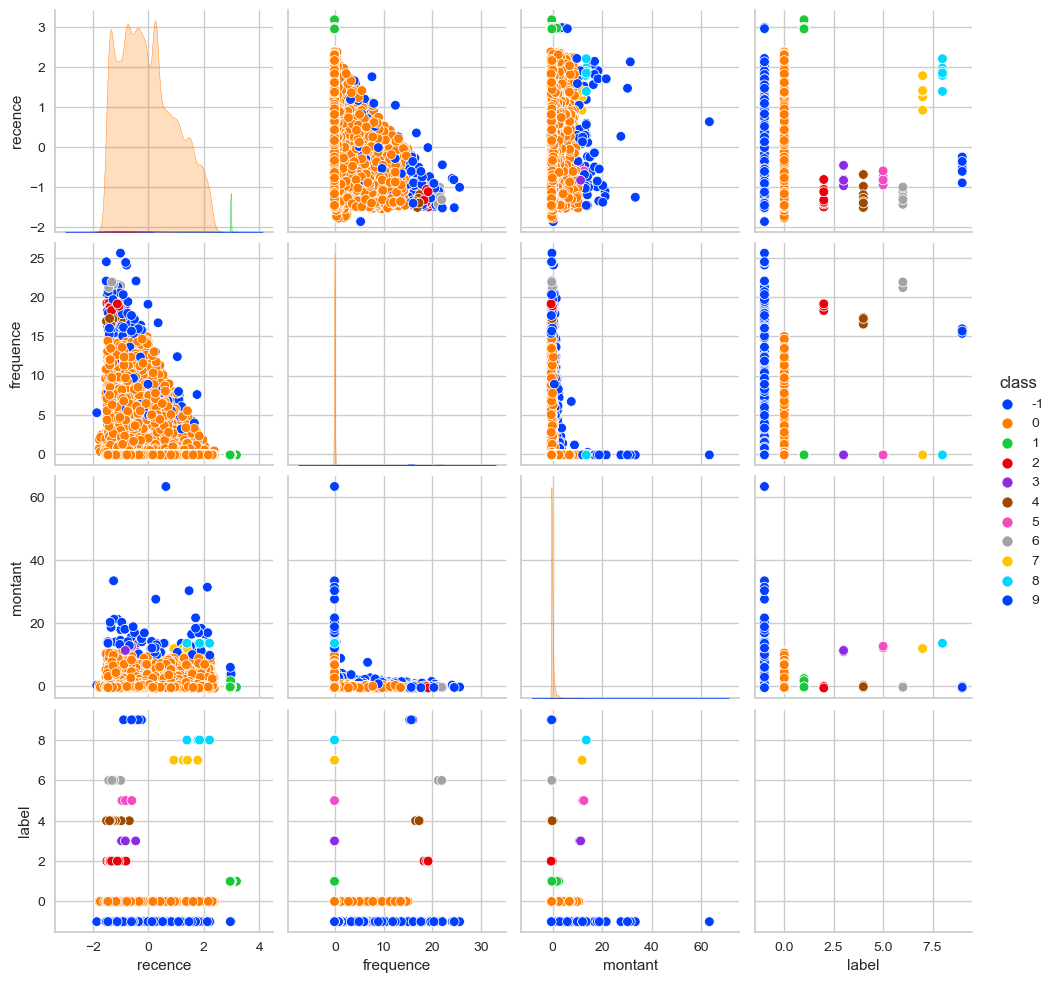

In [47]:
sns.pairplot(data=df_dbscan, hue='class', palette='bright')

Le clustering n'est pas très concluant

- Les classes 2,4,6,9 sont quasiement identiques et pourraient former un seul cluster
- Les classes 8,7 sont quasiement identiques et pourraient aussi former un seul cluster
- Les classes 3,5 sont quasiement identiques et pourraient aussi former un seul cluster

Soit eps est trop faible, soit le nombre de min_sample est trop élévé

Le coeficient de silouhette étant très inférieur à KMean, et DBSCAN etant très gourmand en memoire (plusieurs overflows pendant mes tests), je laisse cette solution de coté au profit de Kmean

# Test clustering KMean avec dataset RFM enrichi

## Recherche des variables influentes avec une PCA robuste

In [48]:
def acp(df, robust = True):
    df_pca = df.select_dtypes(['number'])
    df_pca = scale(df_pca, robust)
    pca_columns = df_pca.columns.to_list()
    PCA = decomposition.PCA(n_components=df_pca.shape[1])
    PCA.fit(df_pca.values)

    fig = plt.figure()
    pd.Series(PCA.explained_variance_ratio_).cumsum().plot()
    plt.title('PCA')
    plt.xlabel('N° de composante')
    plt.ylabel('Variance cumulée')
    plt.show()

    print(f'Explication de la variance sur les 2 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1])*100:.2f}%')
    print(f'Explication de la variance sur les 3 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1] + PCA.explained_variance_ratio_[2])*100:.2f}%')
    
    return PCA, pca_columns

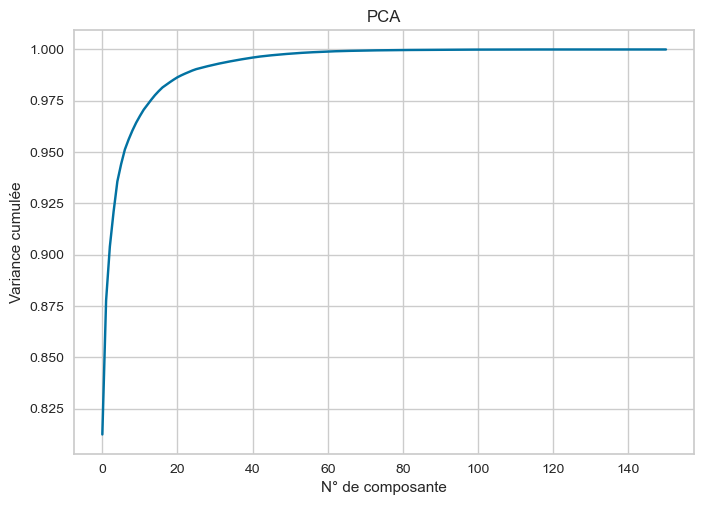

Explication de la variance sur les 2 premiers axes = 87.76%
Explication de la variance sur les 3 premiers axes = 90.39%


In [49]:
pca, columns = acp(df)

In [50]:
df_pca_components = pd.DataFrame(pca.components_[:,[0,1,2]], columns=['F1', 'F2', 'F3'], index=columns)

In [51]:
for column in df_pca_components.columns:
    df_pca_components[column+'_abs'] = df_pca_components[column].abs()

In [52]:
df_pca_components.sort_values(by='F1_abs', ascending=False).loc[:, 'F1'].head()

purchase_quarter_1_count                     -0.695037
purchase_month_6_count                        0.479867
order_length_mean                            -0.234840
cat_construcao_ferramentas_seguranca_count    0.220793
cat_tablets_impressao_imagem_count           -0.128965
Name: F1, dtype: float64

In [53]:
df_pca_components.sort_values(by='F2_abs', ascending=False).loc[:, 'F2'].head()

order_status_shipped_count                0.604599
customer_geolocation_lat_most_frequent   -0.602442
purchase_month_5_count                   -0.363987
seller_count_min                         -0.234203
customer_geolocation_lng_mean             0.173113
Name: F2, dtype: float64

In [54]:
df_pca_components.sort_values(by='F3_abs', ascending=False).loc[:, 'F3'].head()

purchase_quarter_2_count        0.512223
purchase_month_6_count         -0.480464
purchase_day_of_week_6_count    0.286554
purchase_quarter_4_count        0.250848
order_length_mean              -0.235225
Name: F3, dtype: float64

## Influence des variables influentes de la PCA sur le Kmeans

In [59]:
def kmean_enrichie(columns, silhouette_only = True, one_by_one = True):
    results = []
    
    if one_by_one:
        for index, column in enumerate(columns):

            # df enrichie = df RFM + columns
            df_rfm_enrichi = df_rfm.copy()
            df_rfm_enrichi = df_rfm_enrichi.join(df[column])

            # Model kmean
            silhouette = model_kmean(df=df_rfm_enrichi, random_state=RANDOM_STATE, silhouette_only=silhouette_only, silhouette_print=(not silhouette_only))
            print('.', end='')
            results.append([column, f'{silhouette}', f'+{(silhouette - 0.948):.4f}' if silhouette - 0.948 > 0 else ''])

        print('')
        print(tabulate(results, headers=['Colonne', 'Silhouette', 'Progression'], tablefmt='orgtbl'))
    else:
        df_rfm_enrichi = df_rfm.copy()
        df_rfm_enrichi = df_rfm_enrichi.join(df[columns])

        # Model kmean
        silhouette = model_kmean(df=df_rfm_enrichi, random_state=RANDOM_STATE, silhouette_only=silhouette_only, silhouette_print=(not silhouette_only))

In [60]:
columns = df_pca_components.sort_values(by='F1_abs', ascending=False).loc[:, 'F1'].head().index.to_list() \
        + df_pca_components.sort_values(by='F2_abs', ascending=False).loc[:, 'F2'].head().index.to_list() \
        + df_pca_components.sort_values(by='F3_abs', ascending=False).loc[:, 'F3'].head().index.to_list()

kmean_enrichie(columns)

...............
| Colonne                                    |   Silhouette | Progression   |
|--------------------------------------------+--------------+---------------|
| purchase_quarter_1_count                   |     0.945032 |               |
| purchase_month_6_count                     |     0.947023 |               |
| order_length_mean                          |     0.940663 |               |
| cat_construcao_ferramentas_seguranca_count |     0.948425 | +0.0004       |
| cat_tablets_impressao_imagem_count         |     0.948438 | +0.0004       |
| order_status_shipped_count                 |     0.948259 | +0.0003       |
| customer_geolocation_lat_most_frequent     |     0.92718  |               |
| purchase_month_5_count                     |     0.946848 |               |
| seller_count_min                           |     0.945973 |               |
| customer_geolocation_lng_mean              |     0.938811 |               |
| purchase_quarter_2_count                   |  

Les colonnes suivantes augmentent non significativement le score de silhouette du clustering RFM:

- cat_construcao_ferramentas_seguranca_count 
- cat_tablets_impressao_imagem_count         
- order_status_shipped_count                 

## Influence de chaque variable du DF original

In [61]:
original_rfm_columns = ['purchase_days_from_today_min', 'order_frequency', 'mean_orders_price']
kmean_enrichie(df.drop(columns=original_rfm_columns).select_dtypes('number').columns.to_list())

....................................................................................................................................................
| Colonne                                                  |   Silhouette | Progression   |
|----------------------------------------------------------+--------------+---------------|
| orders_count                                             |     0.948221 | +0.0002       |
| customer_geolocation_lat_mean                            |     0.927178 |               |
| customer_geolocation_lat_count                           |     0.948221 | +0.0002       |
| customer_geolocation_lat_most_frequent                   |     0.92718  |               |
| customer_geolocation_lng_mean                            |     0.938811 |               |
| customer_geolocation_lng_count                           |     0.948221 | +0.0002       |
| customer_geolocation_lng_most_frequent                   |     0.938799 |               |
| products_count_min   

Globalement, aucune variable n'influence fortement le clustering

On peut utiliser 'elapse_time_mean' pour renforcer la silhouette du clustering et se permettre d'ajouter d'autres variables pénalisantes pour caractériser un peu plus les clusters sans pénaliser le score silhouette

## Visualisation du clustering par review score

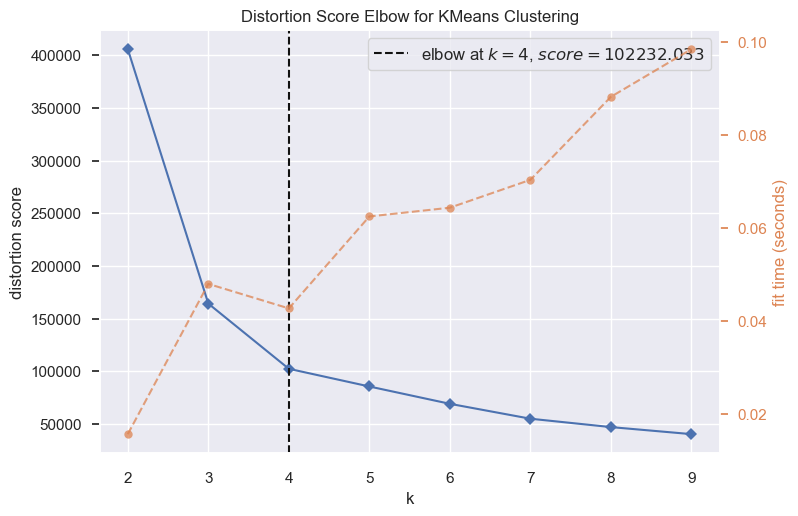

Silhouette: 0.948


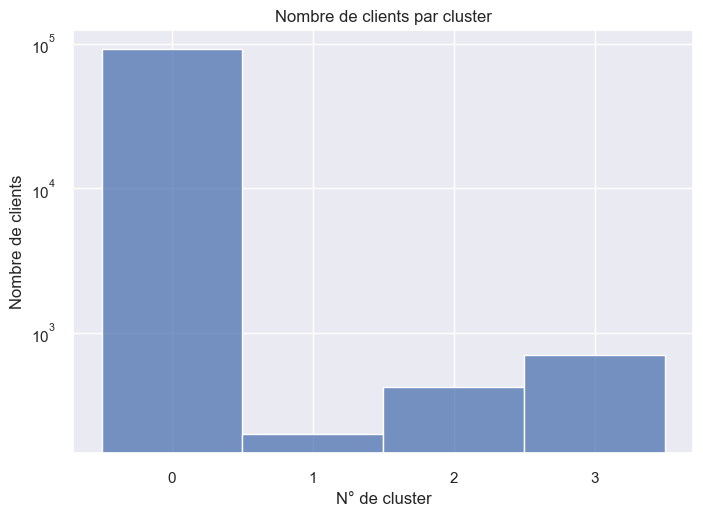

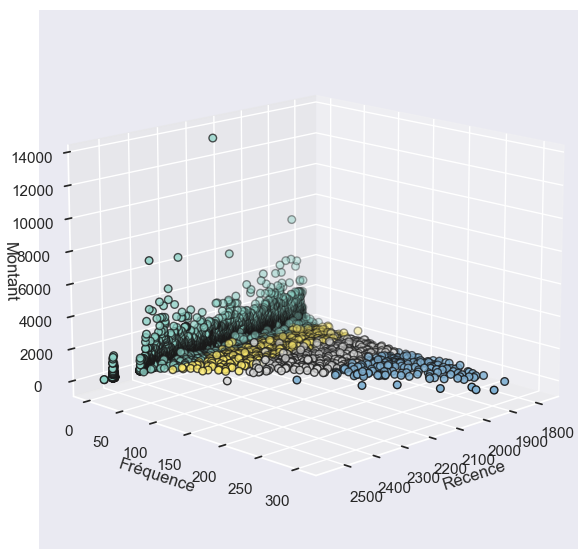

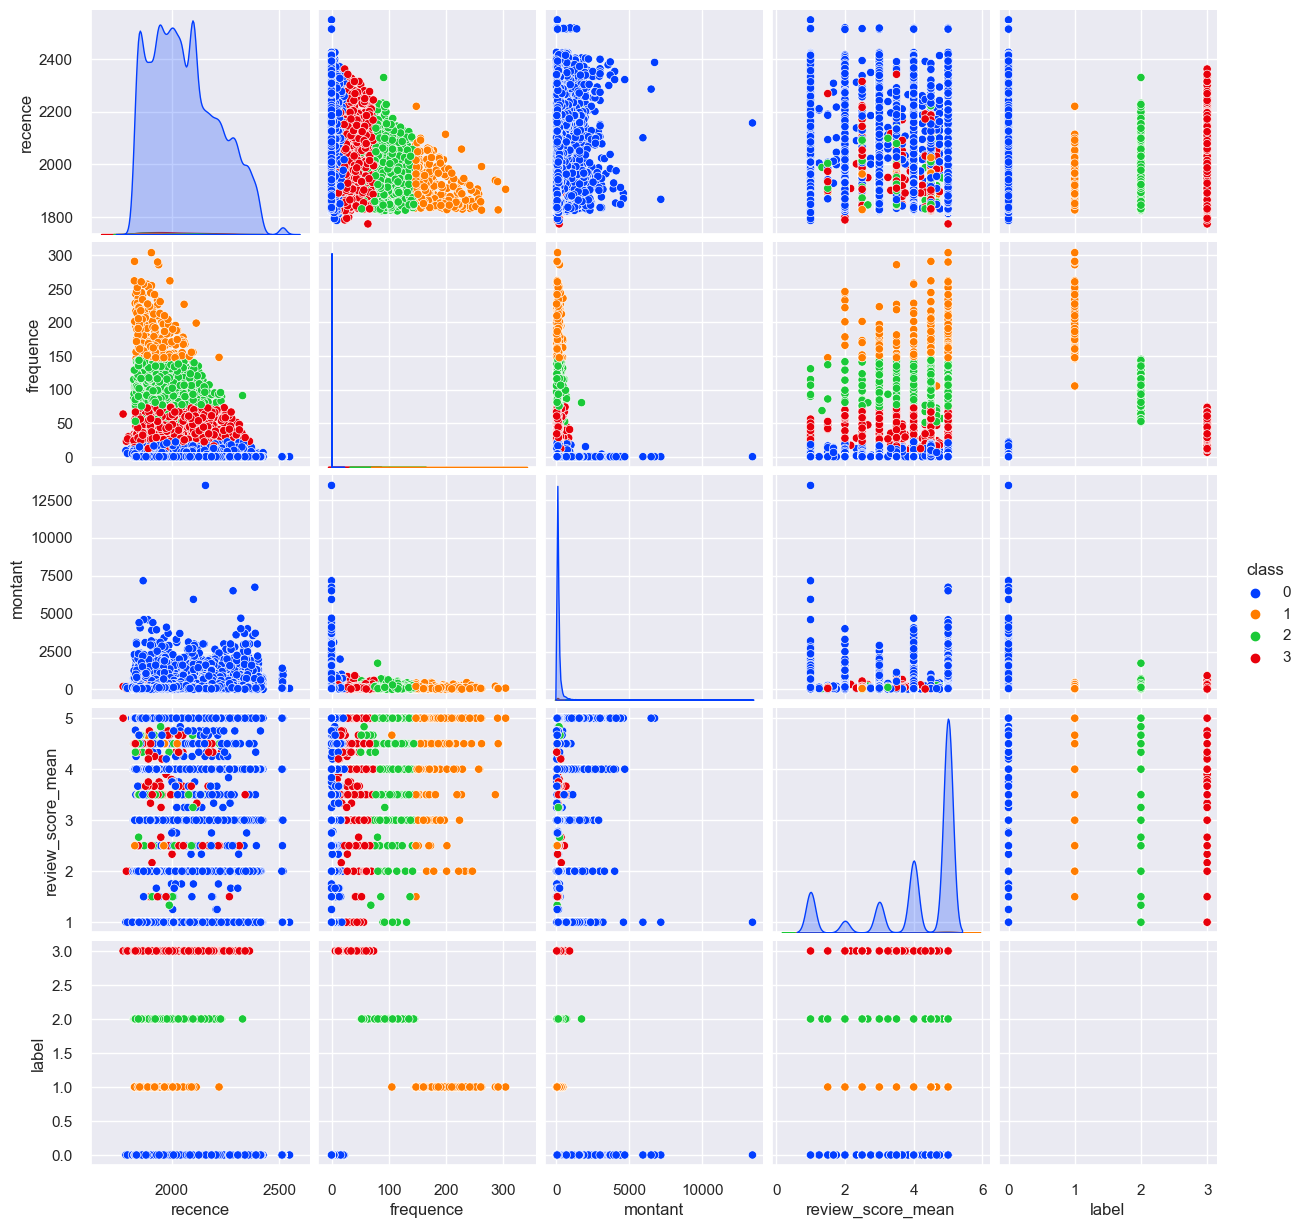

In [404]:
best_columns = ['elapse_time_mean',
                'review_score_mean']
df_rfm_enrichi = df_rfm.join(df[best_columns])
silhouette = model_kmean(df=df_rfm_enrichi, random_state=RANDOM_STATE, custom_pairplots=['review_score_mean'])